## Interest Risk Modeling via PCA (Principal Component Analysis)

### Contents
1. Introduction to PCA
2. Data
3. Visualization of Yield curve
4. PCA applied to finance
    - 4.1. PCA Using Sklearn package
    - 4.2. What is Level, Slope and Curvature?
    - 4.3. Correlation coefficient between PCA and original value
    - 4.4. PCA Analysis
5. [advanced] Autoencoder
    - 5.1. Linear Autoencoder

### 1. Introduction to PCA

![img](https://drive.google.com/uc?id=1xWE6wD65Pv9NPtkutH2TbE6y_ibdvJYE)
- PCA is the bedrock dimensionality reduction technique for probability and statistics.
- It’s still commonly used in machine learning applications when you have big data that might have some statistical distribution and you want to uncover the low dimensional patterns to build models.


### 2. Data


- We use the daily treasury par yield curve rate in U.S. department of the treasury. Data can be found at the following links: [Click yield curve rate Dataset](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldAll)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
bond_data  = pd.read_csv('data/bond_data.csv')

In [32]:
bond_data

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1/2/2007,4.79,4.93,5.07,5.11,5.00,4.80,4.71,4.68,4.68,4.68,4.87,4.79
1,1/3/2007,4.84,4.94,5.05,5.09,4.98,4.76,4.69,4.66,4.66,4.67,4.85,4.77
2,1/4/2007,4.80,4.92,5.04,5.07,4.95,4.71,4.63,4.61,4.61,4.62,4.81,4.72
3,1/5/2007,4.81,4.93,5.05,5.09,4.98,4.76,4.68,4.65,4.65,4.65,4.84,4.74
4,1/8/2007,4.87,4.97,5.08,5.13,5.01,4.78,4.70,4.66,4.66,4.66,4.84,4.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3761,1/14/2022,0.05,0.05,0.13,0.30,0.51,0.99,1.26,1.55,1.72,1.78,2.18,2.12
3762,1/18/2022,0.05,0.06,0.16,0.37,0.58,1.06,1.35,1.65,1.82,1.87,2.24,2.18
3763,1/19/2022,0.05,0.06,0.17,0.36,0.57,1.04,1.33,1.62,1.78,1.83,2.20,2.14
3764,1/20/2022,0.05,0.09,0.17,0.36,0.60,1.08,1.34,1.62,1.77,1.83,2.19,2.14


### 3. Visualization of Yield curve

- Yield curve represent several interest rates across different maturities. 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

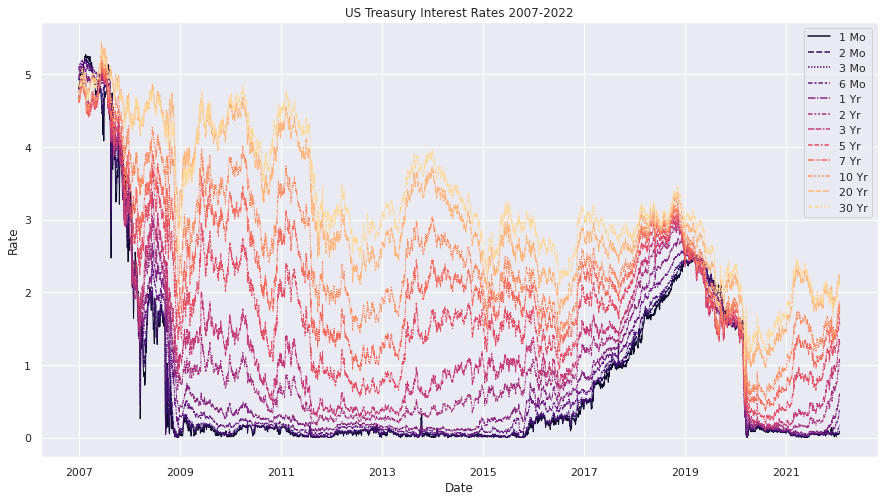

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=bond_data,  linewidth=1.0, palette = "magma")
plt.xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
plt.title("US Treasury Interest Rates 2007-2022")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.show()

### 4. PCA applied to finance

* Principal Component Analysis (PCA) quantifies movements in a specific market. Consider bonds with different maturities. Changes in the yield curve do not move randomly, but are influenced by specific rules. for example, investors often refer to movements in the yield curve in  terms of three driving factors: **level**, **slope**, and **curvature**. PCA formalizes this viewpoint and allows us to evaluate when a sector of the yield curve has cheapened or richened beyond that prescribed by recent yield movements. 

- the first principal component records an almost parallel shift of the yield curve
- the second one a change in the slope (tilt)
- the third one a change located in the middle of the term structure (curvature or convexity).


- PC1(Level)
- PC2(Slope)
- PC3(Curvature)

### 4-1. PCA Using Sklearn package

- Sklearn Link : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
from sklearn.decomposition import PCA     # import PCA package

def PCA_analysis(data, norm = False, n_pcs = 10):
    rate_dataset = data.iloc[:, 1:]              # Exclude date columns
    
    if norm == True:
        rate_dataset -= rate_dataset.mean(axis=0)
    else:
        pass
    
    pca = PCA(n_components=n_pcs, svd_solver = "auto", random_state = 2022) 
    pcs_overtime = pca.fit_transform(rate_dataset)
    pcs_overtime_df = pd.DataFrame(data=pcs_overtime)
    
    pcs_shape_df = pd.DataFrame(pca.components_).T
    
    print('explained variance ratio :', pca.explained_variance_ratio_.cumsum()[0:5])
    
    return pcs_shape_df, pcs_overtime_df


In [ ]:
pc_shape, pc_overtime = PCA_analysis(bond_data, norm = True, n_pcs= 10)

explained variance ratio : [0.83620936 0.98533581 0.99707104 0.99880827 0.99935413]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


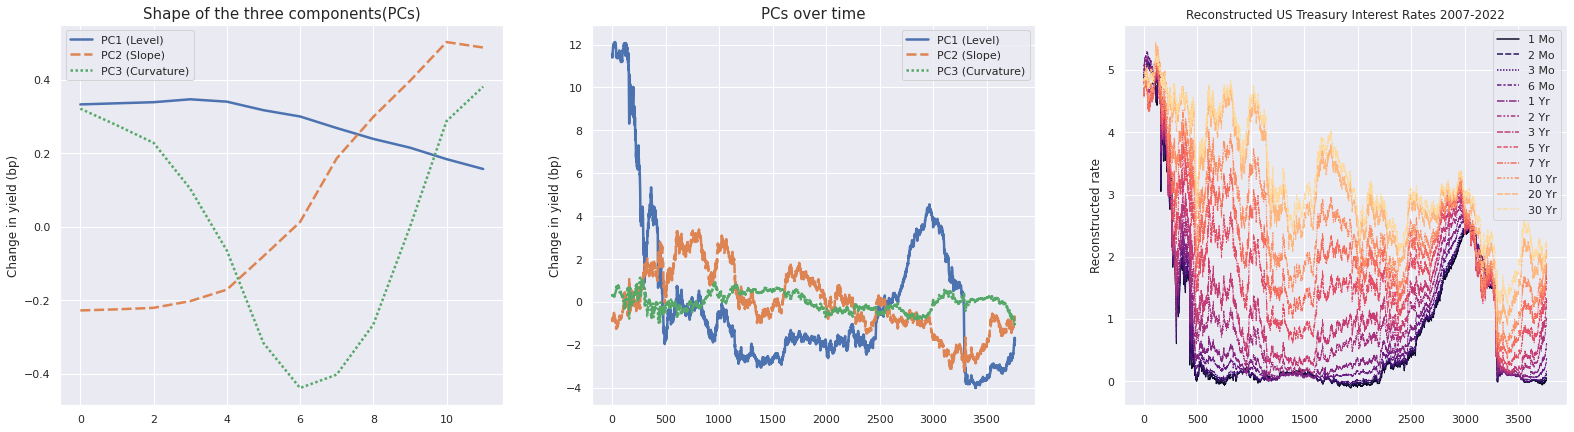

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(27,7))

sns.lineplot(data=pc_shape.iloc[:, :3],  linewidth=2.5, ax = axes[0])
axes[0].set_title("Shape of the three components(PCs)", fontsize = 15)
axes[0].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11],['1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr',  '10 Yr', '20 Yr', '30 Yr'])
axes[0].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])

sns.lineplot(data=pc_overtime.iloc[:, :3],  linewidth=2.5, ax = axes[1])
axes[1].set_title("PCs over time", fontsize = 15)
axes[1].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[1].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[1].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])


reconst = pd.DataFrame(np.dot(pc_overtime.iloc[:, :3].values, pc_shape.iloc[:, :3].values.T), index=bond_data.index, columns=bond_data.columns[1:])
reconst += bond_data.iloc[:, 1:].mean(axis = 0 )
sns.lineplot(data=reconst,  linewidth=1.0, palette = "magma")
axes[2].set_title("Reconstructed US Treasury Interest Rates 2007-2022", fontsize = 12)
axes[2].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[2].set_ylabel("Reconstructed rate", fontsize = 12)

plt.show()

pc_overtime_copy = pc_overtime

### 4-2. What is Level, Slope and Curvature?

![image.png](https://drive.google.com/uc?id=1_B2hKqA7dDr4GAmClPuh176Siks_KjWx)

- **Level**

It indicates the *absolute level of interest rates*, and is mainly used to indicate the direction of the yield.
When *interest rates rise (fall)* and *prices fall (rise)*, it represents a *bear* (bull) movement.
- **Slope**

It indicates *the degree of interest rate spread* and is used as an indicator of opportunities for arbitrage trading due to distortion of the interest rate period structure.
If long-term interest rates minus short-term interest rates are >= 0, it shows a steepening movement. In the opposite case, flattening motion is shown.
When *long-term interest rates rise and short-term interest rates fall*, it is *steepening*, and vice versa is called flattening.
- **Curvature**

The case where neither the *parallel shift(Level) nor the slope change is explained*. This indicates that the shape of the yield curve changes as the curvature changes.

### 4-3. Correlation coefficient between PCA and original value

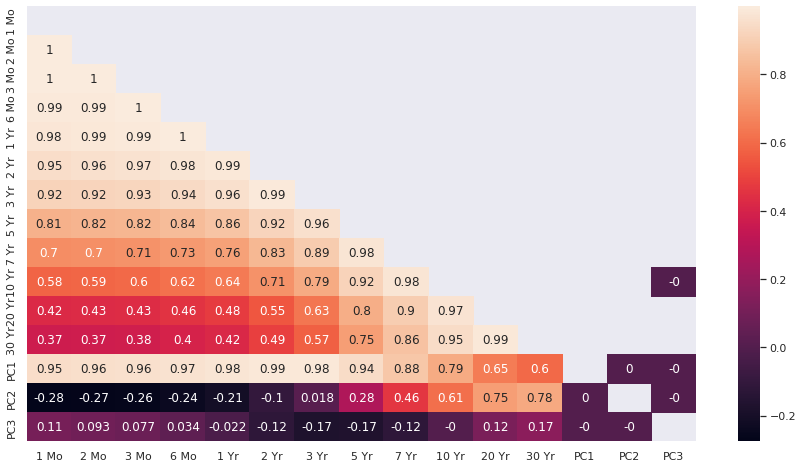

In [ ]:
pc_overtime = pc_overtime.iloc[:, :3]
pc_overtime.columns = ["PC1", "PC2", "PC3"]    

corr_data = pd.concat([bond_data.iloc[:, 1:], pc_overtime], axis = 1).corr().round(3)
mask_upper = np.triu(corr_data)
sns.heatmap(corr_data, annot = True, mask = mask_upper)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


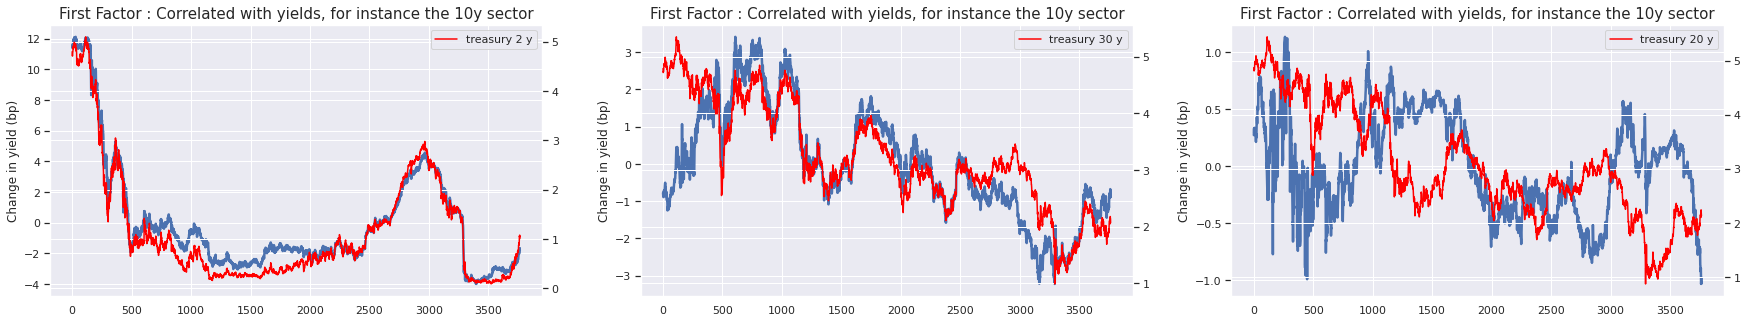

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(30,5))

sns.lineplot(data=pc_overtime.iloc[:, 0],  linewidth=2.5, ax = axes[0])
axes[0].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[0].set_title("First Factor : Correlated with yields, for instance the 10y sector", fontsize = 15)
axes[0].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])

ax2 = axes[0].twinx()
ax2.plot(bond_data.iloc[:, 1:]["2 Yr"], color='red')
ax2.legend(labels=["treasury 2 y"])


sns.lineplot(data=pc_overtime.iloc[:, 1],  linewidth=2.5, ax = axes[1])
axes[1].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[1].set_title("First Factor : Correlated with yields, for instance the 10y sector", fontsize = 15)
axes[1].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])

ax2 = axes[1].twinx()
ax2.plot(bond_data.iloc[:, 1:]["30 Yr"], color='red')
ax2.legend(labels=["treasury 30 y"])


sns.lineplot(data=pc_overtime.iloc[:, 2],  linewidth=2.5, ax = axes[2])
axes[2].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[2].set_title("First Factor : Correlated with yields, for instance the 10y sector", fontsize = 15)
axes[2].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])

ax2 = axes[2].twinx()
ax2.plot(bond_data.iloc[:, 1:]["20 Yr"], color='red')
ax2.legend(labels=["treasury 20 y"])

### 4-4. PCA Analysis through Eigenvalue Decomposition

In [ ]:
import scipy

def PCA_solver(df, num_reconstruct):
    
    dataset = df.copy()
    
    dataset -= dataset.mean(axis = 0)
    C = np.dot(dataset.T, dataset)
    eigenvals , eigenvecs = scipy.linalg.eigh(C)
    
    eigenvecs = eigenvecs[:, np.argsort(eigenvals)[::-1]]
    eigenvals = eigenvals[np.argsort(eigenvals)[::-1]]
    eigenvecs = eigenvecs[:, :num_reconstruct]

    return np.dot(eigenvecs.T, dataset.T).T, eigenvals, eigenvecs

In [ ]:
bond_data = pd.read_csv("bond_data.csv").iloc[:, 1:]

scores, evals, evecs = PCA_solver(bond_data, 3)

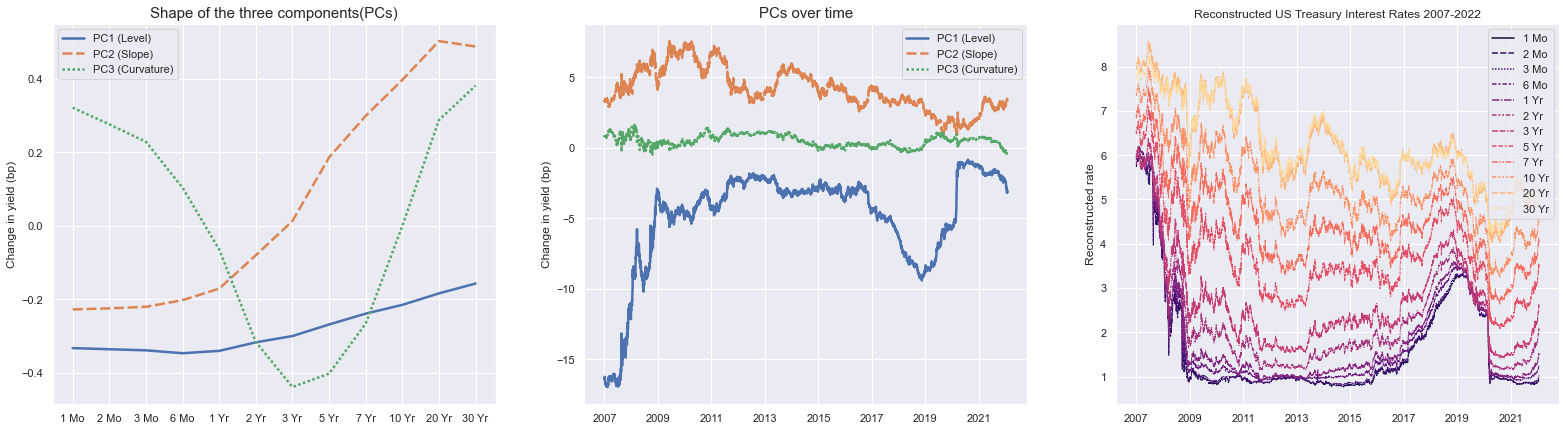

In [ ]:
evecs = pd.DataFrame(evecs)
score = pd.DataFrame(scores)

fig, axes = plt.subplots(1, 3, figsize=(27,7))

sns.lineplot(data=evecs.iloc[:, :3],  linewidth=2.5, ax = axes[0])
axes[0].set_title("Shape of the three components(PCs)", fontsize = 15)
axes[0].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11],['1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr',  '10 Yr', '20 Yr', '30 Yr'])
axes[0].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])

sns.lineplot(data=score.iloc[:, :3],  linewidth=2.5, ax = axes[1])
axes[1].set_title("PCs over time", fontsize = 15)
axes[1].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[1].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[1].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])


reconst = pd.DataFrame(np.dot(scores,evecs.T), index=bond_data.index, columns=bond_data.columns)
reconst += bond_data.iloc[:, 1:].mean(axis = 0 )
sns.lineplot(data=reconst,  linewidth=1.0, palette = "magma")
axes[2].set_title("Reconstructed US Treasury Interest Rates 2007-2022", fontsize = 12)
axes[2].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[2].set_ylabel("Reconstructed rate", fontsize = 12)

plt.savefig("Figure_7.png")

plt.show()

## [Advanced] 5. Autoencoder

![image.png](https://drive.google.com/uc?id=17CIHo-9f0bcOhWBGnIcCkqdr_8b07xDP)

Source :KB Kim, *YT Hwang*, DC Lim, SH Kim, JH Lee, and *YJ Lee*, (2022), Diagnosis and Prescription for Household Financial Health via Risk Information embedded Hierarchical AutoEncoder and Its Post-hoc Analysis, working paper

- An autoencoder (AE) is a dimension reduction technique based on artificial neural networks and is often referred to as a deep learning version of principal component analysis (PCA), one of the most popular dimension reduction methods. While PCA is only able to capture linear dependence structures within data, AE is known to capture complex non-linear dependencies well. 
- The AE is composed of an encoder function $f_{ENC}: R^d→R^k$ and a decoder function $f_{DEC}: R^d→R^k$. The encoder function $f_{ENC}$ is a mapping from high-dimensional data $Χ∈R^{(N×d)}$ with N samples and d features to corresponding embeddings $Z∈R^{(N×k)}$ in a k-dimensional latent space with $k≪d$. The decoder function $f_{DEC}$ is a mapping from embeddings $Z∈R^{(N×k)}$ to the original data $Χ∈R^{(N×d)}$. AE is trained to minimize the following reconstruction loss:

$$l_{AE}= ∥Χ-f_{DEC} (f_{ENC} (Χ)) ∥_F^2$$

where $∥∙∥_F^2$ is the Frobenius norm. 

### 5-1. Linear Autoencoder

In [ ]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.backends.cudnn as cudnn
from tqdm import tqdm
import random

seed = 2022
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
cudnn.benchmark = False
cudnn.deterministic = True

#### Simple dataloaer

In [ ]:
class bondDataloader(Dataset):
    def __init__(self, csvdata):
        self.dataset = csvdata.values
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        
        return torch.tensor(self.dataset[idx], dtype = torch.float32)
        

#### Hyperparameter

In [ ]:
device = torch.device("cuda:0")
batch_size = 64
learning_rate = 1e-3
epochs = 20 

In [ ]:
bond_data = pd.read_csv("bond_data.csv")
bond_data = bond_data.iloc[:, 1:] - bond_data.iloc[:, 1:].mean(axis=0)

train_dataset = bondDataloader(bond_data)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,shuffle=True)
test_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,shuffle=False)

#### Model

In [ ]:
class LinearAE(nn.Module):
    def __init__(self):
        super(LinearAE, self).__init__()
        
        self.encoder = nn.Sequential(
                nn.Linear(12, 10, bias = False),
        )
        
        self.decoder =  nn.Sequential(
               nn.Linear(10, 12, bias = False),
        )
        
    
    def forward(self, bond_input):
        encoder_output = self.encoder(bond_input)
        decoder_output = self.decoder(encoder_output)
        return encoder_output, decoder_output

In [ ]:
autoencoder = LinearAE()
autoencoder = autoencoder.to(device)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr = learning_rate)
criterion = nn.MSELoss()

#### Learning

In [ ]:
def train_step(batch_item):
    bond_batch_x = batch_item.to(device)
    bond_batch_y = batch_item.to(device)
    
    autoencoder.train()
    optimizer.zero_grad()

    encoder, decoder = autoencoder(bond_batch_x)
    loss = criterion(decoder, bond_batch_y)
    
    loss.backward()
    optimizer.step()
        
    return loss

In [ ]:
for epoch in range(epochs):
    total_loss = 0
    
    tqdm_dataset = tqdm(enumerate(train_dataloader))
        
    for batch, batch_item in tqdm_dataset:
        batch_loss = train_step(batch_item)
        total_loss += batch_loss
        
        tqdm_dataset.set_postfix({
                'Epoch': epoch + 1,
                'Loss': '{:06f}'.format(batch_loss.item()),
                'Mean Loss' : '{:06f}'.format(total_loss/(batch+1))
            })
            

59it [00:00, 102.10it/s, Epoch=1, Loss=0.628597, Mean Loss=1.043537]
59it [00:00, 129.21it/s, Epoch=2, Loss=0.189057, Mean Loss=0.368367]
59it [00:00, 130.50it/s, Epoch=3, Loss=0.067643, Mean Loss=0.105607]
59it [00:00, 128.36it/s, Epoch=4, Loss=0.039107, Mean Loss=0.048583]
59it [00:00, 124.79it/s, Epoch=5, Loss=0.024055, Mean Loss=0.030111]
59it [00:00, 131.78it/s, Epoch=6, Loss=0.026412, Mean Loss=0.021494]
59it [00:00, 133.55it/s, Epoch=7, Loss=0.013391, Mean Loss=0.017496]
59it [00:00, 133.22it/s, Epoch=8, Loss=0.014501, Mean Loss=0.015580]
59it [00:00, 132.75it/s, Epoch=9, Loss=0.018307, Mean Loss=0.014361]
59it [00:00, 133.88it/s, Epoch=10, Loss=0.011360, Mean Loss=0.013270]
59it [00:00, 128.81it/s, Epoch=11, Loss=0.012699, Mean Loss=0.012233]
59it [00:00, 128.51it/s, Epoch=12, Loss=0.010211, Mean Loss=0.011204]
59it [00:00, 128.05it/s, Epoch=13, Loss=0.009579, Mean Loss=0.010203]
59it [00:00, 132.46it/s, Epoch=14, Loss=0.011092, Mean Loss=0.009252]
59it [00:00, 129.65it/s, Epoc

In [ ]:
def predict(dataset):
    autoencoder.eval()
    tqdm_dataset = tqdm(enumerate(dataset))
    results = []
    for batch, batch_item in tqdm_dataset:
        bond_batch_x = batch_item.to(device)

        with torch.no_grad():
            encoder, decoder = autoencoder(bond_batch_x)
                        
        results.extend(encoder.cpu().numpy())

    return results

preds = predict(test_dataloader)

59it [00:00, 1093.30it/s]


In [ ]:
AE_PCs = pd.DataFrame(preds)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


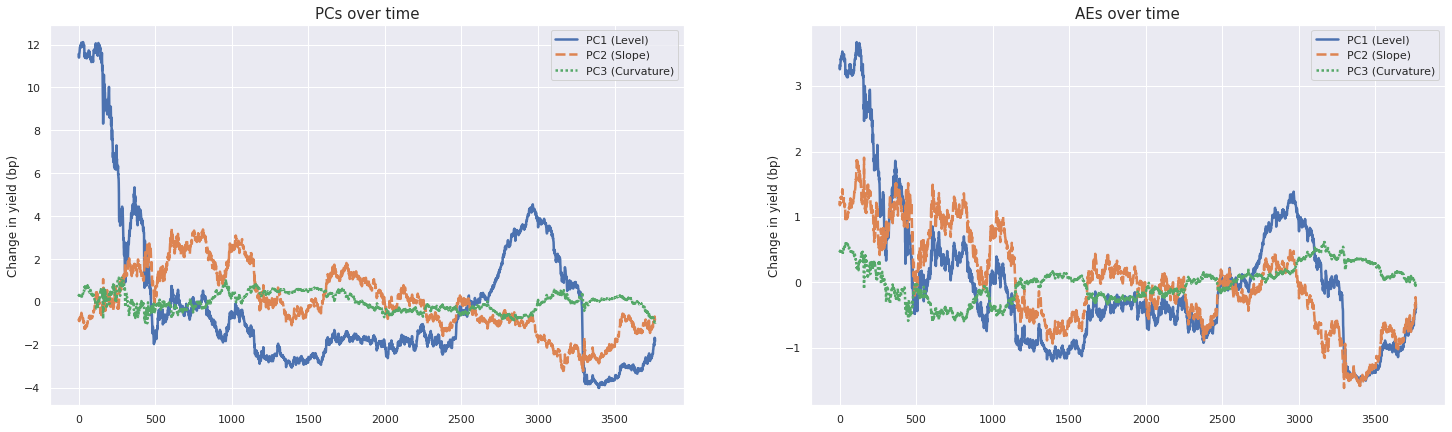

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25,7))

sns.lineplot(data=pc_overtime_copy.iloc[:, :3],  linewidth=2.5, ax = axes[0])
axes[0].set_title("PCs over time", fontsize = 15)
axes[0].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[0].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[0].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])

AE_data = AE_PCs.iloc[:, :3]
AE_data.columns = ["AE_PC1" ,"AE_PC3", "AE_PC2"] # for ordering
AE_data = AE_data[["AE_PC1", "AE_PC2", "AE_PC3"]]

sns.lineplot(data=AE_data,  linewidth=2.5, ax = axes[1])
axes[1].set_title("AEs over time", fontsize = 15)
axes[1].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[1].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[1].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])
plt.savefig("Figure_8.png")

plt.show()

In [ ]:
AE_PCA_corr = pd.concat([pc_overtime, AE_data], axis = 1).corr().round(3)
AE_PCA_corr

,PC1,PC2,PC3,AE_PC1,AE_PC2,AE_PC3
PC1,1.000,0.000,-0.000,0.980,0.661,0.332
PC2,0.000,1.000,-0.000,0.167,0.739,-0.911
PC3,-0.000,-0.000,1.000,-0.093,-0.127,0.231
AE_PC1,0.980,0.167,-0.093,1.000,0.783,0.151
AE_PC2,0.661,0.739,-0.127,0.783,1.000,-0.483
AE_PC3,0.332,-0.911,0.231,0.151,-0.483,1.000
